In [4]:
import pandas as pd
import numpy as np
import re
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
url = '/content/drive/MyDrive/AB_NY_2019.xlsx'
data = pd.read_excel(url)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,6,5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,19,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,16,3


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,10.494202,3.000368
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,5.772061,1.416352
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,5.000000,2.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,11.000000,3.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,16.000000,4.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,20.000000,5.000000


In [17]:
##Data Cleaning

In [18]:
missing_values = data.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
name                    26
host_name               22
last_review          10052
reviews_per_month    10052
dtype: int64


In [19]:
missing_percentage = round((data.isnull().sum() / data.shape[0]) * 100,3)
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

last_review          20.558
reviews_per_month    20.558
name                  0.053
host_name             0.045
dtype: float64

In [20]:
raw_missing_host_name = data[data['host_name'].isnull()]
raw_missing_host_name.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88,16,4
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342,5,4
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359,9,3


In [21]:
for index, row in raw_missing_host_name.iterrows():
    search_frams = data[data['host_id'] == row['host_id']]
    host_name_any = search_frams['host_name'].notnull().any().any()
    if host_name_any:
        print(f"Host Id: {row['host_id']}")

In [22]:
# Fill missing 'name' and 'host_name' values with "unknown"
data['name'].fillna("unknown", inplace=True)
data['host_name'].fillna("unknown", inplace=True)

In [23]:
raw_missing_last_review = data[data['last_review'].isnull()]
raw_missing_last_review.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,19,1
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,9,2
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,4,4


In [24]:
NotNullReview = raw_missing_last_review['number_of_reviews'].any().any()
print(f"Do we have any count of Review available from missing last Review Date: {str(NotNullReview)}")

Do we have any count of Review available from missing last Review Date: False


In [25]:
data.drop('last_review',axis=1,inplace=True)


In [26]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)


In [27]:
data.drop('id',axis=1,inplace=True)


In [28]:
data.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_guests                  0
review_rating                     0
dtype: int64

In [29]:
# Changing the host name to string data type
data['host_name'] = data['host_name'].astype(str)

srt_host_data = data.sort_values(by='host_name')
print(f"Top 10 Host Names:\n {srt_host_data['host_name'].head(10)}")
print("------------------------------------------")
print(f"Bottom 10 Host Names:\n {srt_host_data['host_name'].tail(10)}")

Top 10 Host Names:
 11137                        'Cil
10315             (Ari) HENRY LEE
13700    (Email hidden by Airbnb)
15242    (Email hidden by Airbnb)
43183    (Email hidden by Airbnb)
5330     (Email hidden by Airbnb)
3789     (Email hidden by Airbnb)
35170    (Email hidden by Airbnb)
19544                 (Mary) Haiy
39433                         123
Name: host_name, dtype: object
------------------------------------------
Bottom 10 Host Names:
 39742      éŸ¦è¾¾
47942    é“€ Yuli
47940    é“€ Yuli
47941    é“€ Yuli
41882      ë¹ˆë‚˜
14019      ë‹¨ë¹„
29170         ì§„
33877      ì†Œì •
47262      ì†Œì •
33137      í˜„ì„ 
Name: host_name, dtype: object


In [30]:
for host, group_data in data.groupby(data['host_id']):
    HostNames = group_data['host_name'].values
    if len(set(HostNames)) > 1:
        print(f"Host id: {host}")
        print("Host id has multi Host names")
        print(HostNames)
        data.loc[data['host_id'] == host,'host_name'] = HostNames[0]   # Replace all host name with first host name if found any
        print("-------------------------")

In [31]:
def CleanString(name):
    name = re.sub(r'[^A-Za-z\s]', '', name)   # # Remove unwanted characters
    name = ' '.join(name.split())  # # Remove extra spaces
    if name == '':
        name = 'unknown'  ## It fills the empty string with 'unknown' value.
    return name.lower()  # # Convert string to Lower case


data['CleanedHostName'] = data['host_name'].apply(CleanString)

In [32]:
data['CleanedHostName'] = data['CleanedHostName'].str.title()


In [33]:
# Drop old host_name column
data.drop('host_name',axis=1,inplace=True)

In [34]:
# Changing the name to string data type
data['name'] = data['name'].astype(str)
data['CleanedName'] = data['name'].apply(CleanString)      # Calling user defined function 'CleanString'


# Drop old name column
data.drop('name',axis=1,inplace=True)

In [35]:
data.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_guests                    int64
review_rating                       int64
CleanedHostName                    object
CleanedName                        object
dtype: object

In [36]:
duplicated_data = data.duplicated()
print(f"Total number of duplicated rows: {duplicated_data.sum()}")

Total number of duplicated rows: 0


In [37]:
data.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating,CleanedHostName,CleanedName
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,1,1,John,clean quiet apt home by the park
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,6,5,Jennifer,skylit midtown castle
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,19,1,Elisabeth,the village of harlemnew york


In [38]:
# Extract Numeric Colums from data
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Columns to exclude
exclude_cols = ['latitude', 'longitude','host_id']

numeric_cols = numeric_cols.difference(exclude_cols)
numeric_cols

Index(['availability_365', 'calculated_host_listings_count', 'minimum_nights',
       'number_of_guests', 'number_of_reviews', 'price', 'review_rating',
       'reviews_per_month'],
      dtype='object')

In [39]:
z_scores = np.abs(stats.zscore(data[numeric_cols]))

# Separating outliers with comparing thresold value.
outliers = (z_scores > 3) | (z_scores < -3)
out_count  = outliers.sum()

out_count = out_count[out_count > 0]
out_count

calculated_host_listings_count     680
minimum_nights                     327
number_of_reviews                 1221
price                              388
reviews_per_month                  847
dtype: int64

In [40]:
outliers_columns = out_count.index.tolist()
outliers_columns

['calculated_host_listings_count',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'reviews_per_month']

In [41]:
data_mean = np.mean(data[outliers_columns],axis=0)
data_std = np.std(data[outliers_columns],axis=0)

# Calculate the lower and upper bounds using the z-score formula
lower_bound = data_mean - 3 * data_std
upper_bound = data_mean + 3 * data_std

upper_bound

calculated_host_listings_count    106.000528
minimum_nights                     68.560982
number_of_reviews                 156.924846
price                             873.175829
reviews_per_month                   5.882709
dtype: float64

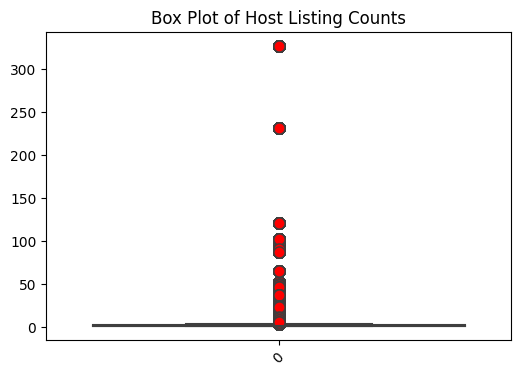

In [45]:
# Calculated Host Listing Count
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['calculated_host_listings_count'],flierprops=dict(markerfacecolor='r', marker='o', markersize=8))
plt.title('Box Plot of Host Listing Counts')
plt.xticks(rotation=45)
plt.show()

In [46]:
filtered_data = data[data['calculated_host_listings_count'] > 200]
filtered_data.shape[0]

559

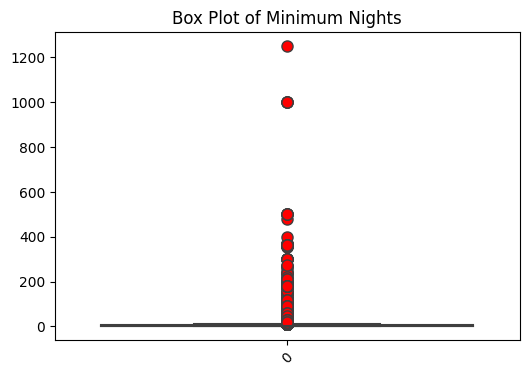

In [47]:
# Minimum Nights
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['minimum_nights'], flierprops=dict(markerfacecolor='r', marker='o', markersize=8))
plt.title('Box Plot of Minimum Nights')
plt.xticks(rotation=45)
plt.show()

In [48]:
filtered_data = data[data['minimum_nights'] > 900]
print(f"Minimum Night With more than 900 days: {filtered_data.shape[0]}")

Minimum Night With more than 900 days: 5


In [49]:
# Drop Rows
data = data.drop(data[data['minimum_nights'] > 900].index)

filtered_data = data[data['minimum_nights'] > 900]
print(f"Minimum Night With more than 900 days: {filtered_data.shape[0]}")

Minimum Night With more than 900 days: 0


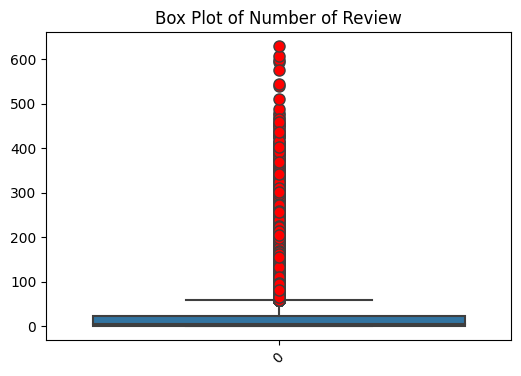

In [50]:

# Number of Review
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['number_of_reviews'],flierprops=dict(markerfacecolor='r', marker='o', markersize=8))
plt.title('Box Plot of Number of Review')
plt.xticks(rotation=45)
plt.show()

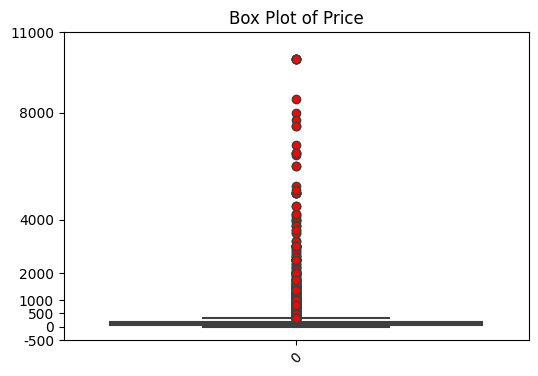

In [51]:
# Price
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['price'],flierprops=dict(markerfacecolor='r', marker='o', markersize=6))
plt.title('Box Plot of Price')
plt.xticks(rotation=45)
custom_tick = [-500, 0, 500, 1000, 2000,4000,8000,11000 ]
plt.yticks(custom_tick,custom_tick)
# plt.ylim(data['price'].min(),data['price'].max()+9000)
plt.show()

In [52]:
filtered_data = data[data['price'] > 8000]
for area in filtered_data['neighbourhood'].tolist():
    print(area)

East Harlem
Astoria
Lower East Side
Greenpoint
Upper West Side
Tribeca
Lower East Side


In [53]:
filtered_data = data[data['price'] == 0]
print(f"AirBNB price with zero amount: {filtered_data.shape[0]}")

print("__________________________")
print("Room Type: ")
Rooms = (set(filtered_data['room_type'].tolist()))
for room in Rooms:
    print(room)

print("__________________________")
print("Neighbourhood Group: ")
Areas = (set(filtered_data['neighbourhood_group'].tolist()))
for area in Areas:
    print(area)

AirBNB price with zero amount: 11
__________________________
Room Type: 
Entire home/apt
Shared room
Private room
__________________________
Neighbourhood Group: 
Bronx
Manhattan
Brooklyn


In [54]:
# Fix the issue of zero price, based on 'neighbourhood_group', 'neighbourhood' and 'room_type'.

New_price_dict = {}
filtered_price_rows = False
for index, row in filtered_data.iterrows():
    # print(row['neighbourhood_group'])
    # print(row['neighbourhood'])
    # print(row['room_type'])
    key = row['neighbourhood_group'] +"_"+row['neighbourhood']+"_"+ row['room_type']
    if key not in New_price_dict:
        # Filter by neighbourhood_group, neighbourhood and room type
        filtered_price_rows = data[(data['neighbourhood_group'] == row['neighbourhood_group']) & (data['neighbourhood'] == row['neighbourhood']) & (data['room_type'] == row['room_type'])]

        # Filter by neighbourhood_group and room type
        if filtered_price_rows.shape[0] == 0:
            filtered_price_rows = data[(data['neighbourhood_group'] == row['neighbourhood_group']) & (data['room_type'] == row['room_type'])]

        avg_price = int(np.mean(filtered_price_rows['price']))
        New_price_dict[key] = avg_price

    price = New_price_dict[key]
    data.loc[index, 'price'] = price

In [55]:
filtered_data = data[data['price'] == 0]
print(f"AirBNB price with zero amount: {filtered_data.shape[0]}")

AirBNB price with zero amount: 0


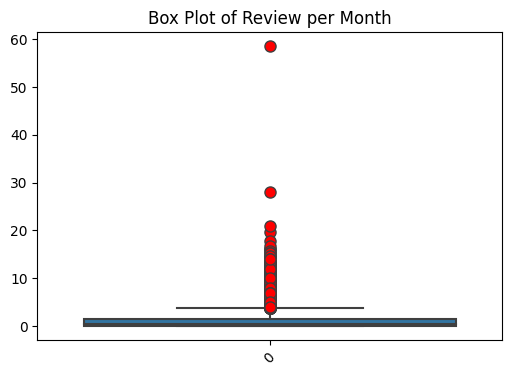

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['reviews_per_month'],flierprops=dict(markerfacecolor='r', marker='o', markersize=8))
plt.title('Box Plot of Review per Month')
plt.xticks(rotation=45)
plt.show()

In [57]:
filtered_data = data[data['reviews_per_month'] > 50]
print(f"Extremly High Review Per Month: {filtered_data.shape[0]}")

filtered_data

Extremly High Review Per Month: 1


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_guests,review_rating,CleanedHostName,CleanedName
42075,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299,18,2,Row Nyc,enjoy great views of the city in our deluxe room


In [58]:
# Drop Row
data = data.drop(data[data['reviews_per_month'] > 50].index)

filtered_data = data[data['reviews_per_month'] > 50]
print(f"Extremly High Review Per Month: {filtered_data.shape[0]}")

Extremly High Review Per Month: 0


In [59]:
data.to_csv('Cleaned_AB_NY_2019.csv', index=False)